In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = '../../results/data/experiment1_postbug'
df = None
# Load data
for file in os.listdir(data_dir):
    if not file.endswith('.csv'):
        continue
    if df is None:
        df = pd.read_csv(f'{data_dir}/{file}')
    else:
        df = pd.concat([df, pd.read_csv(f'{data_dir}/{file}')])


# df = pd.read_csv(f'{data_dir}/709551_set1_entropy_bb-True_default.csv')

In [5]:
df.head()

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
0,0,Other,precision,0.952903,677968,set1,random,False,log,tta,0.0
1,0,Other,recall,0.456470,677968,set1,random,False,log,tta,0.0
2,0,Other,f1,0.617258,677968,set1,random,False,log,tta,0.0
3,0,CG,precision,0.292364,677968,set1,random,False,log,tta,0.0
4,0,CG,recall,0.772323,677968,set1,random,False,log,tta,0.0


/tmp/ipykernel_2356276/2926596954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bb_tta'] = 'BB-' + filtered_df['background_bias'].astype(str) + '_Feature-' + filtered_df['feature'].apply(lambda x: str(x).upper() if x == 'tta' else str(x))


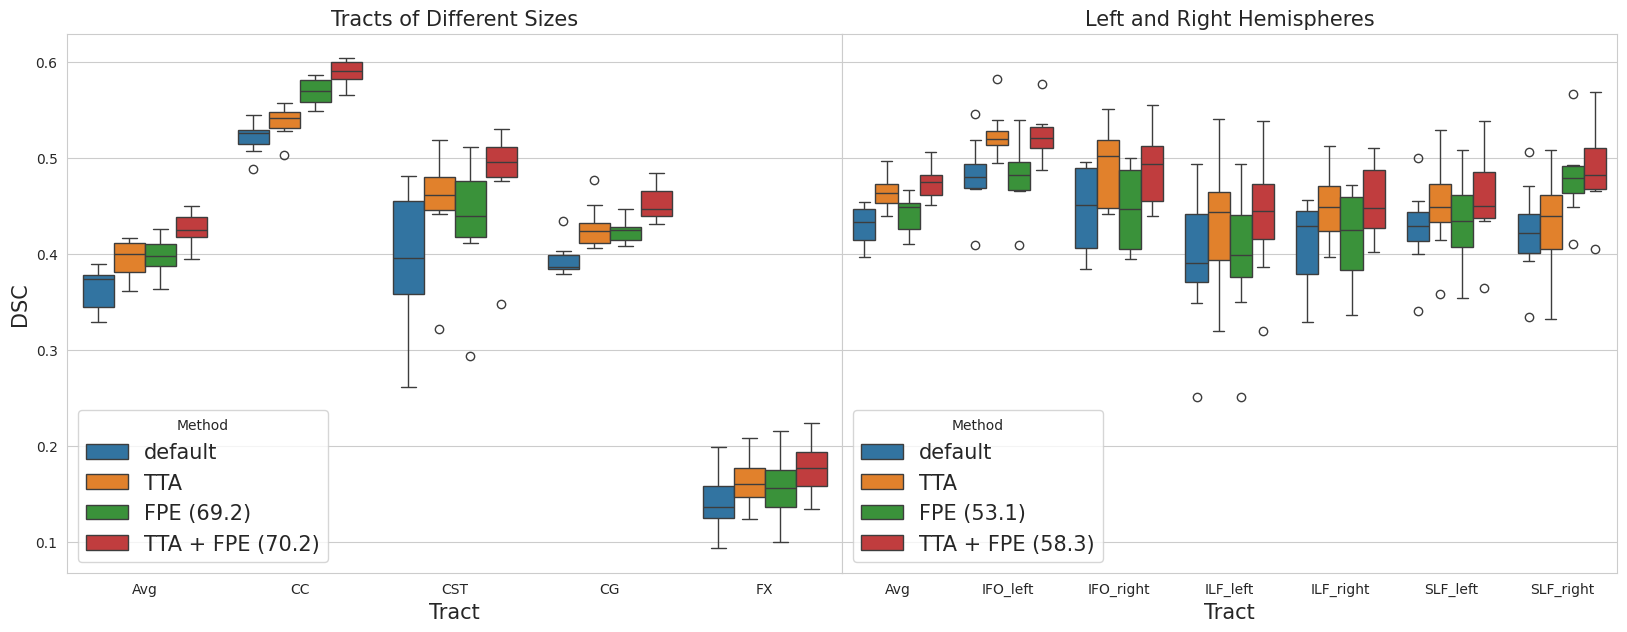

In [4]:
sns.set_style("whitegrid")

filtered_df = df[
    # (df['region'] == 'Avg') &
    (df['score_type'] == 'f1') &
    (df['iteration'] == 0) &
    (df['region'] != 'Other')
]


filtered_df['bb_tta'] = 'BB-' + filtered_df['background_bias'].astype(str) + '_Feature-' + filtered_df['feature'].apply(lambda x: str(x).upper() if x == 'tta' else str(x))

# Get unique labelsets
labelsets = filtered_df['labelset'].unique()
hue_order = ['BB-False_Feature-default', 'BB-False_Feature-TTA', 'BB-True_Feature-default' , 'BB-True_Feature-TTA']

method_name_mapping = {
    'BB-False_Feature-default': 'Vanilla',
    'BB-False_Feature-TTA': 'TTA',
    'BB-True_Feature-default': 'FPE',
    'BB-True_Feature-TTA': 'TTA + FPE'
}

labelset_name_mapping = {
    'set1': 'Tracts of Different Sizes',
    'set2': 'Left and Right Hemispheres',
}

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(20, 7), sharey=True)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    if labelset == 'set1':
        order = ['Avg', 'CC', 'CST', 'CG', 'FX']
    else:
        order = ['Avg', 'IFO_left', 'IFO_right', 'ILF_left', 'ILF_right', 'SLF_left', 'SLF_right']

    # Create boxplot
    sns.boxplot(
        data=subset,
        x='region',
        y='score',
        hue='bb_tta',
        ax=ax,
        hue_order=hue_order,
        order=order
        # errorbar='ci'
    )
    ax.set_title(f'{labelset_name_mapping[labelset]}', fontsize=15)
    ax.set_xlabel('Tract', fontsize=15)
    ax.set_ylabel('DSC', fontsize=15)
    # if ax == axes[0]:
    #     ax.legend_.remove()
    # else:
    #     handles, labels = ax.get_legend_handles_labels()
    #     labels = [method_name_mapping[label] for label in labels]
    #     ax.legend(handles, labels, title='Method')


    subset = filtered_df[filtered_df['labelset'] == labelset]
    bb_subset = subset[subset['background_bias'] == True]
    mean_frac = bb_subset.groupby(['iteration', 'feature'])['bb_flipped_fg_frac'].mean().reset_index()
    # if ax == axes[0]:
    #     ax.legend_.remove()
    # else:
    handles, labels = ax.get_legend_handles_labels()
    labels_tmp = []
    for label in labels:
        if 'BB-True' in label:
            if 'TTA' in label:
                percentage_bb = (1 - mean_frac['bb_flipped_fg_frac'][mean_frac['feature'] == 'tta'].values[0]) * 100
                labels_tmp.append(f'{method_name_mapping[label]} ({percentage_bb:.1f})')
            else:
                percentage_bb = (1 - mean_frac['bb_flipped_fg_frac'][mean_frac['feature'] == 'default'].values[0]) * 100
                labels_tmp.append(f'{method_name_mapping[label]} ({percentage_bb:.1f})')
            # labels_tmp.append(f'{method_name_mapping[label]} ({0})')
        else:
            labels_tmp.append(method_name_mapping[label])

    # labels = [method_name_mapping[label]  for label in labels ]
    #     f'{method_name_mapping[label]} ({0})' for label in labels if 'BB' in label else method_name_mapping[label]
    # ]
    ax.legend(handles, labels_tmp, title='Method', loc='lower left', fontsize=15)
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(f'{data_dir}/experiment_BB-FPE_15-font.jpg', bbox_inches='tight', dpi=300)

/tmp/ipykernel_4074793/1541690481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bb_tta'] = 'BB-' + filtered_df['background_bias'].astype(str) + '_Feature-' + filtered_df['feature'].apply(lambda x: str(x).upper() if x == 'tta' else str(x))


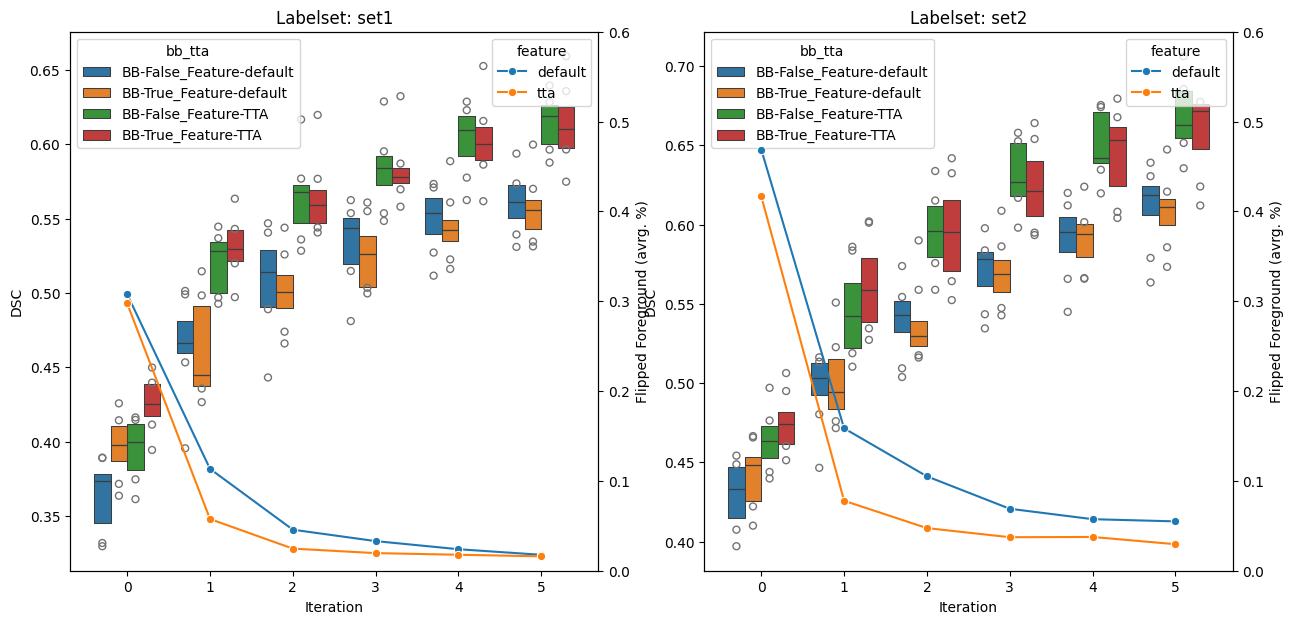

In [39]:
filtered_df = df[
    (df['region'] == 'Avg') &
    (df['score_type'] == 'f1')
]


filtered_df['bb_tta'] = 'BB-' + filtered_df['background_bias'].astype(str) + '_Feature-' + filtered_df['feature'].apply(lambda x: str(x).upper() if x == 'tta' else str(x))

# Get unique labelsets
labelsets = filtered_df['labelset'].unique()
hue_order = ['BB-False_Feature-default', 'BB-True_Feature-default' , 'BB-False_Feature-TTA', 'BB-True_Feature-TTA']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.boxenplot(
        data=subset,
        x='iteration',
        y='score',
        hue='bb_tta',
        ax=ax,
        hue_order=hue_order
        # errorbar='ci'
    )
    ax.set_title(f'Labelset: {labelset}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('DSC')


    # Create secondary y-axis
    ax2 = ax.twinx()
    
    # Calculate mean bb_flipped_fg_frac for each iteration
    bb_subset = subset[subset['background_bias'] == True]
    mean_frac = bb_subset.groupby(['iteration', 'feature'])['bb_flipped_fg_frac'].mean().reset_index()
    
    # Plot lineplot on secondary y-axis
    sns.lineplot(
        data=mean_frac,
        x='iteration',
        y='bb_flipped_fg_frac',
        ax=ax2,
        hue='feature',
        marker='o'
    )
    ax2.set_ylabel('Flipped Foreground (avrg. %)')
    ax2.set_ylim(0, 0.6)
    ax2.grid(False)


fig.savefig(f'{data_dir}/experiment-BB+TTA.png')

In [52]:
subset = filtered_df[filtered_df['labelset'] == 'set1']
bb_subset = subset[subset['background_bias'] == True]
mean_frac = bb_subset.groupby(['iteration', 'feature'])['bb_flipped_fg_frac'].mean().reset_index()

In [72]:
mean_frac['bb_flipped_fg_frac'][mean_frac['feature'] == 'tta'].values[0]

0.29751663447084997

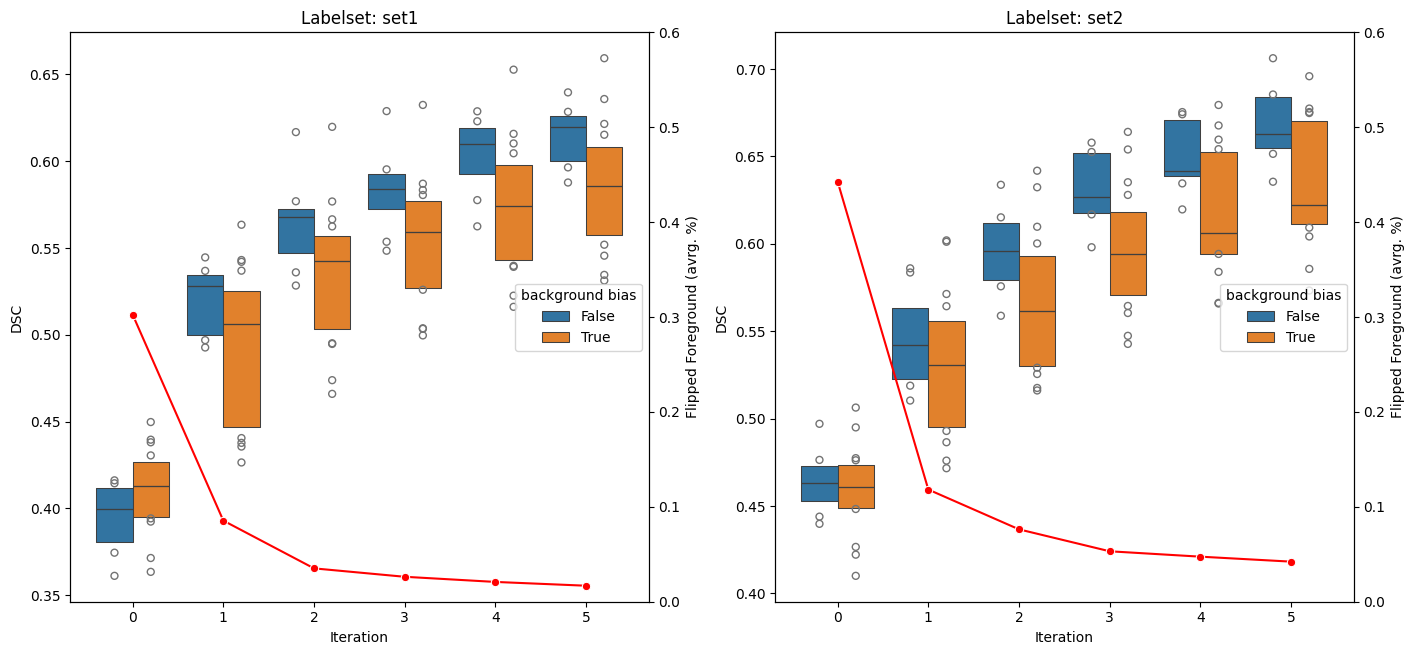

In [7]:
filtered_df = df[
    (df['region'] == 'Avg') &
    (df['score_type'] == 'f1')
]

# Get unique labelsets
labelsets = filtered_df['labelset'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.boxenplot(
        data=subset,
        x='iteration',
        y='score',
        hue='background_bias',
        ax=ax,
        # errorbar='ci'
    )
    ax.set_title(f'Labelset: {labelset}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('DSC')
    ax.legend(title='background bias', loc='center right')
    
    # Create secondary y-axis
    ax2 = ax.twinx()
    
    # Calculate mean bb_flipped_fg_frac for each iteration
    bb_subset = subset[subset['background_bias'] == True]
    mean_frac = bb_subset.groupby('iteration')['bb_flipped_fg_frac'].mean().reset_index()
    
    # Plot lineplot on secondary y-axis
    sns.lineplot(
        data=mean_frac,
        x='iteration',
        y='bb_flipped_fg_frac',
        ax=ax2,
        color='red',
        marker='o'
    )
    ax2.set_ylabel('Flipped Foreground (avrg. %)')
    ax2.set_ylim(0, 0.6)
    ax2.grid(False)

# Set common x-axis label
# fig.text(0.5, 0.04, 'Iteration', ha='center')

# Add a legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', title='Background Bias')

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# fig.savefig(f'{data_dir}/experiment1_f1.png')

In [19]:
filtered_df[(filtered_df['subject_id'] == 782561) & (filtered_df['iteration'] == 2)]

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
53,2,Avg,f1,0.531104,782561,set1,entropy,False,log,default,0.000000
53,2,Avg,f1,0.531441,782561,set1,entropy,True,log,default,0.096322
71,2,Avg,f1,0.511856,782561,set2,entropy,False,log,default,0.000000
71,2,Avg,f1,0.520321,782561,set2,entropy,True,log,default,0.390691
